<a href="https://colab.research.google.com/github/naokityokoyama/Projetos_Data_Science/blob/main/Kaggle_ford.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Métodos para lidar com dados desbalanceados
*    Undersampling – Consiste em reduzir de forma aleatória os exemplos da classe majoritária.
*    NearMiss – É um algoritmo de undersampling que consiste em reduzir de forma aleatória os exemplos da classe majoritária, porém ele seleciona os exemplos com base na distância.

Quando instâncias das duas classes estão muito próximas umas das outras, removemos as instâncias da classe majoritária para termos uma maior separabilidade entre as classes.

*    Oversampling – Consiste em replicar dados aleatórios da classe minoritária. Como estamos duplicando os dados já existentes este método está propício a dar overfitting.
*    Smote – Consiste em gerar dados sintéticos (não duplicados) da classe minoritária a partir de vizinhos.

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
pd.read_csv('https://storage.googleapis.com/teste_naoki/ford/stayalert/fordTrain.csv')

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,P8,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,0,0,0,34.7406,9.84593,1400,42.8571,0.290601,572,104.8950,0,0.000,0.00,1,-20,0.015875,324,1,1,1,57,0.0,101.96,0.175,752,5.99375,0,2005,0,13.4,0,4,14.8004
1,0,1,0,34.4215,13.41120,1400,42.8571,0.290601,572,104.8950,0,0.000,0.00,1,-20,0.015875,324,1,1,1,57,0.0,101.98,0.455,752,5.99375,0,2007,0,13.4,0,4,14.7729
2,0,2,0,34.3447,15.18520,1400,42.8571,0.290601,576,104.1670,0,0.000,0.00,1,-20,0.015875,324,1,1,1,57,0.0,101.97,0.280,752,5.99375,0,2011,0,13.4,0,4,14.7736
3,0,3,0,34.3421,8.84696,1400,42.8571,0.290601,576,104.1670,0,0.000,0.00,1,-20,0.015875,324,1,1,1,57,0.0,101.99,0.070,752,5.99375,0,2015,0,13.4,0,4,14.7667
4,0,4,0,34.3322,14.69940,1400,42.8571,0.290601,576,104.1670,0,0.000,0.00,1,-20,0.015875,324,1,1,1,57,0.0,102.07,0.175,752,5.99375,0,2017,0,13.4,0,4,14.7757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604324,510,1194,1,32.0051,10.13240,800,75.0000,0.081731,680,88.2353,0,17.807,222.11,0,0,0.016379,322,2,2,1,64,0.0,91.51,0.280,240,3.01875,0,1801,0,30.4,0,4,15.8113
604325,510,1195,1,32.0393,12.45040,800,75.0000,0.081731,680,88.2353,0,17.807,222.11,0,0,0.016379,322,2,2,1,64,0.0,91.51,0.280,240,3.01875,0,1801,0,30.4,0,4,15.8018
604326,510,1196,1,32.0762,10.06180,800,75.0000,0.081731,680,88.2353,0,17.807,222.11,0,0,0.016379,322,2,2,1,64,0.0,91.56,0.175,240,3.01875,0,1800,0,31.3,0,4,15.8120
604327,510,1197,1,32.1154,17.84500,800,75.0000,0.081731,680,88.2353,0,17.807,222.11,0,0,0.016379,322,2,2,1,64,0.0,91.56,0.175,240,3.01875,0,1800,0,31.3,0,4,15.8270


In [ ]:
train = pd.read_csv('fordTrain.csv')
test= pd.read_csv('fordTest.csv')
train.head(3)

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,P8,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,0,0,0,34.7406,9.84593,1400,42.8571,0.290601,572,104.895,0,0.0,0.0,1,-20,0.015875,324,1,1,1,57,0.0,101.96,0.175,752,5.99375,0,2005,0,13.4,0,4,14.8004
1,0,1,0,34.4215,13.41120,1400,42.8571,0.290601,572,104.895,0,0.0,0.0,1,-20,0.015875,324,1,1,1,57,0.0,101.98,0.455,752,5.99375,0,2007,0,13.4,0,4,14.7729
2,0,2,0,34.3447,15.18520,1400,42.8571,0.290601,576,104.167,0,0.0,0.0,1,-20,0.015875,324,1,1,1,57,0.0,101.97,0.280,752,5.99375,0,2011,0,13.4,0,4,14.7736


In [ ]:
train = train.dropna()

In [ ]:
train.IsAlert.value_counts()

1    349785
0    254544
Name: IsAlert, dtype: int64

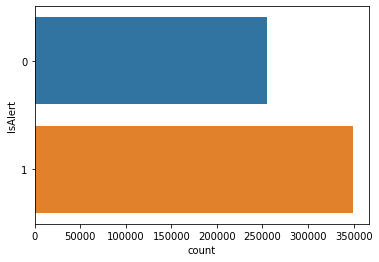

In [ ]:
sns.countplot(y="IsAlert", data=train)

In [ ]:
X = train.drop('IsAlert', axis=1)
y = train['IsAlert']

In [ ]:
#balanceando com SMOTE
smt = SMOTE()
X,y = nr.fit_resample(X,y)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


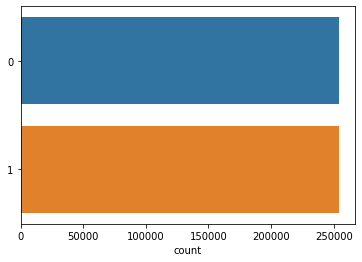

In [ ]:
sns.countplot(y=y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, stratify=y, random_state=42)

Decision Tree

In [ ]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
tree.score(X_train, y_train)

1.0

In [ ]:
tree.score(X_test, y_test) #sem 0.9891473020487537 #smote 0.9891865878331926 #near 0.9895106955548135

0.9893633738631676

Random Forest

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rf.score(X_train, y_train)

1.0

In [ ]:
rf.score(X_test, y_test) #0.994391954271347

0.9945196330707733

Grid Search

In [ ]:
# 1 hiperparametros
rf_parametros = {
    'n_estimators' : [100,200],
    'max_depth' : [2,4], 
    'min_samples_leaf' : [1,2]
    }

gd = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=rf_parametros, verbose=True)

gd.fit(X_train, y_train)

print (gd.best_score_)
print (gd.best_estimator_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed: 28.9min finished


0.8609988459744151
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


In [ ]:
#2 hiperparametros
rf_parametros = {
    'n_estimators' : [200,400, 600],
    'max_depth' : [4,6,8], 
    'min_samples_leaf' : [1,2,3]
    }

gd = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=rf_parametros, verbose=True)

gd.fit(X_train, y_train)

print (gd.best_score_)
print (gd.best_estimator_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed: 459.9min finished


0.9294644830210916
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


In [ ]:
#3 hiperparametros
rf_parametros = {
    'n_estimators' : [800, 1000],
    'max_depth' : [10,12], 
    'min_samples_leaf' : [4,5]
    }

gd = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=rf_parametros, verbose=True)

gd.fit(X_train, y_train)

print (gd.best_score_)
print (gd.best_estimator_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')